# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Gian Patar P. Sirait
- Email: giansirait18@gmail.com 
- Id Dicoding:giansirait

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import shap
import joblib

c:\Users\gians\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
df = pd.read_csv('employee_data.csv')

In [3]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Missing Value Check

In [5]:
missing = df.isnull().sum() / len(df) * 100
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing Values (%):\n", missing)

Missing Values (%):
 Attrition    28.027211
dtype: float64


Duplicated Check

In [6]:
count_duplicated = df.duplicated().sum()
print(f"Number of duplicated rows: {count_duplicated}")

Number of duplicated rows: 0


Memisahkan Kolom Numerik dengan Kolom Kategori

In [7]:
kolom_kategori = df.select_dtypes(include=['object']).columns
kolom_numerik = df.select_dtypes(include=['number','float64']).columns

In [8]:
print(f"Categorical columns: {len(kolom_kategori)}")
print(f"Numerik columns: {len(kolom_numerik)}")

Categorical columns: 8
Numerik columns: 27


**Info Dataset**
- terdapat 8 kolom kategori (termasuk target)
- terdapat 27 kolom Numerik
- Jumlah kolom = 35
- Tidak ditemukan duplikat data
- terdapat missing value pada target kolom sebanyak 412 record

Deskripsi Statistik

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1058.0,0.169187,0.375094,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


In [10]:
df.describe(include='object').T

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


Dengan menggunakan describe  kita bisa tahu statistik deskriptif analiis dari data numerik dan data kaetegori yang dimiliki. 

Distribution Check

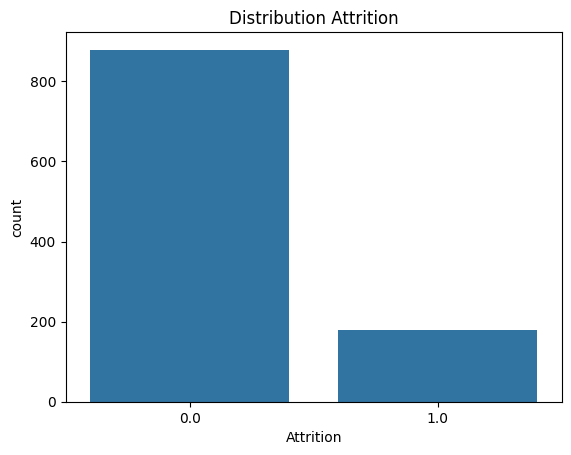

In [11]:
sns.countplot(x='Attrition', data=df)
plt.title('Distribution Attrition')
plt.show()

Pada variabel **Attrition** sebagai data dependen mengalami ketidak seimbangan data (**imbalance**).

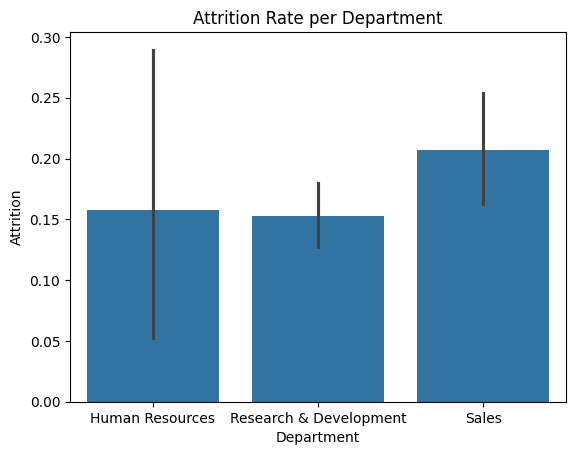

In [12]:
sns.barplot(x='Department', y='Attrition', data=df)
plt.title("Attrition Rate per Department")
plt.show()

Korelasi Variabel dengan target

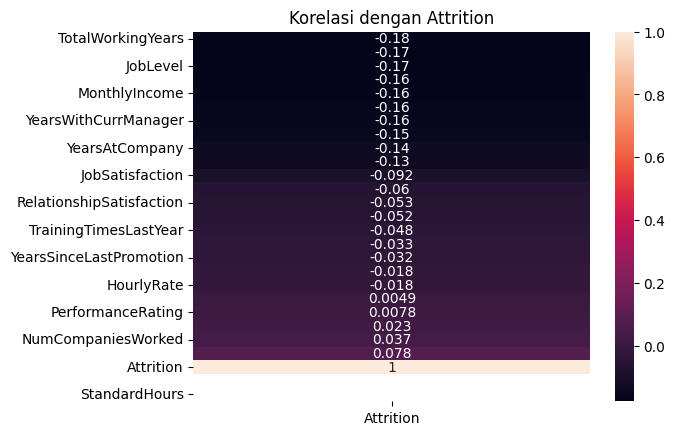

In [13]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix[['Attrition']].sort_values(by='Attrition', ascending=True), annot=True)
plt.title("Korelasi dengan Attrition")
plt.show()

Outlier Check

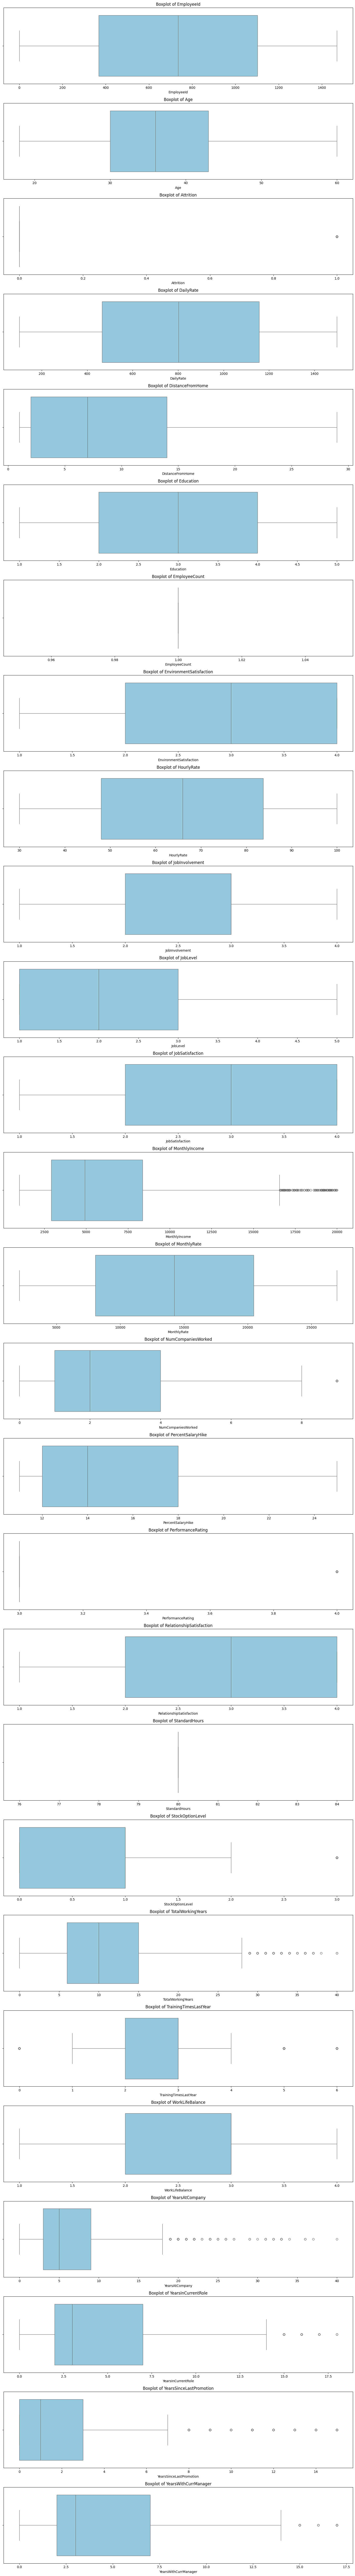

In [14]:
# Buat boxplot untuk tiap kolom numerik
plt.figure(figsize=(15, len(kolom_numerik)*4))  # Sesuaikan ukuran plot
for i, kolom in enumerate(kolom_numerik, 1):
    plt.subplot(len(kolom_numerik), 1, i)
    sns.boxplot(x=df[kolom], color='skyblue')
    plt.title(f'Boxplot of {kolom}', fontsize=12)
    plt.tight_layout()
plt.show()

Terdapat outlier di beberapa variable tetapi outlier yang ada dianggap sebagai bagian dari data yang valid, Karena mencerminkan keadaan yang sebenarnya.

## Data Preparation / Preprocessing

Menghapus Kolom Yang Tidak Perlu

In [15]:
df.drop(columns=['EmployeeId', 'Over18'], axis=1, inplace=True)

Menghapus 'EmployeeID' karena tidak diperlukan dalam pembangunan model dan analysis, 'Over18' redundant karena ada variabel yang memuat umur setiap karyaawan.

Menghapus missing value target

In [16]:
df.dropna(inplace=True)

In [17]:
missing = df.isnull().sum() / len(df) * 100
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing Values (%):\n", missing)

Missing Values (%):
 Series([], dtype: float64)


Encoding 

Encoding Nominal

In [18]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(handle_unknown='ignore')
# # Simpan encoder
# joblib.dump(encoder, 'onehot_encoder.pkl')

In [20]:
# Fitur Nominal (tidak ada urutan)
nominal_features = [
    'Department', 'EducationField', 'Gender', 
    'JobRole', 'MaritalStatus', 'OverTime'
]
# encoded_data = encoder.fit_transform(df[nominal_features])
# One-Hot Encoding
df_nominal_encoded = pd.get_dummies(df[nominal_features], drop_first=False,dtype=int)

training_columns = df_nominal_encoded.columns.tolist()
joblib.dump(training_columns, 'training_columns.pkl')

['training_columns.pkl']

Encoding Ordinal

In [21]:
# Hanya BusinessTravel yang perlu di-encode
ordinal_mapping = {
    'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
}

df['BusinessTravel'] = df['BusinessTravel'].map(ordinal_mapping['BusinessTravel'])

Gabungkan Fitur Encoding 

In [22]:
# Gabungkan fitur nominal yang sudah di-encode dengan fitur ordinal
df_final = pd.concat([df.drop(columns=nominal_features), df_nominal_encoded], axis=1)

In [23]:
df_final.drop(columns=['OverTime_No'], axis=1, inplace=True)

Scaling

Tidak dilakukan scaling karena akan berfokus pada model Tree-Based Models.

## Modeling

Feature Selection

Feature Selection tidak dilakukan, karena tujuan utama adalah membantu HRD mengetahui pengaruh yang paling besar yang menyebabkan karyawan keluar.

In [24]:
print(df_final["Attrition"].value_counts(normalize=True) * 100)

Attrition
0.0    83.081285
1.0    16.918715
Name: proportion, dtype: float64


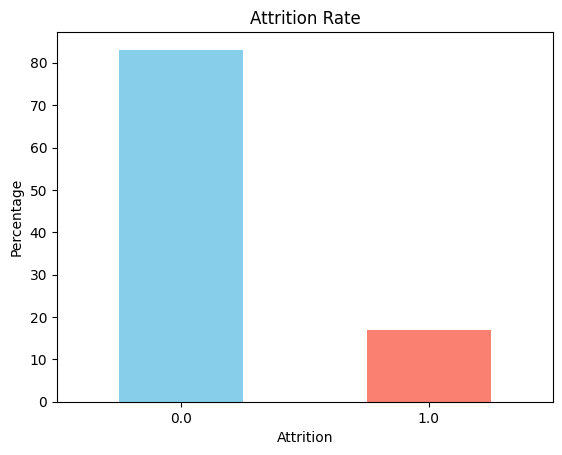

In [25]:
attrition_percent = df_final["Attrition"].value_counts(normalize=True) * 100

attrition_percent.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Attrition Rate') 
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

Splitting Data

In [26]:
# Pisahkan fitur dan target
X = df_final.drop("Attrition", axis=1)
y = df_final["Attrition"]

Feature Selection

In [27]:
corr_matrix = X.corr().abs()

In [28]:
# --------------------------------------------------------
#  Identifikasi fitur dengan korelasi > 0.8
# --------------------------------------------------------

# Ambil segitiga atas dari matriks korelasi (tanpa diagonal)
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)  # k=1 untuk hindari diagonal
)

# Daftar fitur dengan korelasi > 0.8
high_corr_features = [
    column for column in upper_triangle.columns 
    if any(upper_triangle[column] > 0.8)
]


In [29]:
# --------------------------------------------------------
# 4. Hapus fitur yang terindikasi korelasi tinggi
# --------------------------------------------------------
X_filtered = X.drop(high_corr_features, axis=1)

In [30]:
# --------------------------------------------------------
# 5. Tampilkan hasil
# --------------------------------------------------------
print("Fitur yang dihapus karena korelasi >0.8:", high_corr_features)
print("\nShape sebelum feature selection:", X.shape)
print("Shape setelah feature selection:", X_filtered.shape)

Fitur yang dihapus karena korelasi >0.8: ['MonthlyIncome', 'Department_Sales', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Sales Executive']

Shape sebelum feature selection: (1058, 50)
Shape setelah feature selection: (1058, 45)


In [31]:
# --------------------------------------
# 2. Split Data (SEBELUM OVERSAMPLING)
# --------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y,  # Pertahankan distribusi imbalance
    random_state=42
)

Text(0.5, 1.0, 'Sebelum SMOTE')

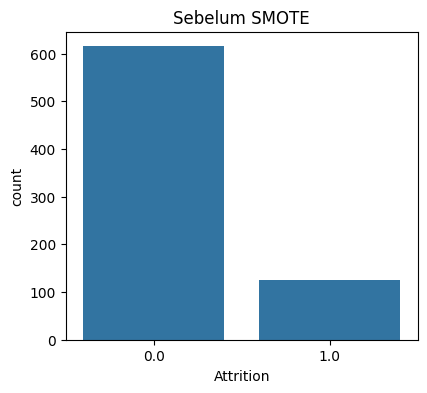

In [32]:
# --------------------------------------
# 3. Cek Imbalance Sebelum SMOTE
# --------------------------------------
# Visualisasi distribusi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Sebelum SMOTE")

In [33]:
# --------------------------------------
# 4. Lakukan SMOTE (HANYA pada data training)
# --------------------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Setelah SMOTE:
Attrition
1.0    50.00%
0.0    50.00%
Name: proportion, dtype: object


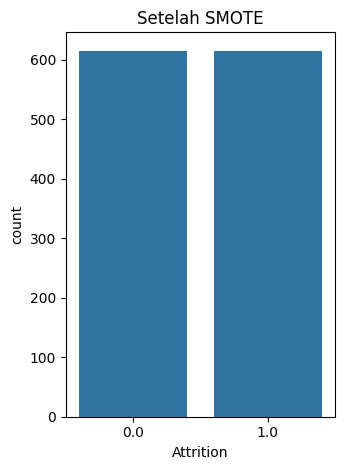

In [34]:
# --------------------------------------
# 5. Cek Imbalance Setelah SMOTE
# --------------------------------------
print("\nSetelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True).apply(lambda x: f"{x*100:.2f}%"))

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title("Setelah SMOTE")
plt.tight_layout()
plt.show()

In [35]:
# --------------------------------------
# Definisi Model dengan Class Weighting
# --------------------------------------
models = {
    "XGBoost": XGBClassifier(
        scale_pos_weight=1,  # Karena data sudah seimbang setelah SMOTE, bobot = 1
        subsample=0.8,
        eval_metric='logloss',
        random_state=42
    ),
    "LightGBM": LGBMClassifier(
        is_unbalance=False,  # Data sudah seimbang, tidak perlu penanganan tambahan
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        class_weight='balanced',  # Tetap gunakan class weighting untuk kehati-hatian
        n_estimators=100,
        random_state=42
    )
}

In [36]:
# --------------------------------------
# Cross-Validation untuk Evaluasi Awal
# --------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    print(f"\nEvaluasi model {name} dengan Cross-Validation...")
    cv_scores = []
    for train_idx, val_idx in cv.split(X_train_resampled, y_train_resampled):
        X_train_cv, X_val_cv = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
        y_train_cv, y_val_cv = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred_val = model.predict(X_val_cv)
        cv_scores.append(roc_auc_score(y_val_cv, y_pred_val))
    
    results[name] = {
        'CV ROC-AUC Mean': np.mean(cv_scores),
        'CV ROC-AUC Std': np.std(cv_scores)
    }


Evaluasi model XGBoost dengan Cross-Validation...

Evaluasi model LightGBM dengan Cross-Validation...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 492, number of negative: 492
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,000853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1145
[LightGBM] [Info] Number of data points in the train set: 984, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 492, number of negative: 492
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000322 sec

## Evaluation

In [37]:
# --------------------------------------
# Pelatihan Model & Evaluasi pada Data Test
# --------------------------------------
final_metrics = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Simpan metrik
    final_metrics[name] = {
        'Accuracy': np.round(accuracy_score(y_test, y_pred), 3),
        'Precision': np.round(precision_score(y_test, y_pred), 3),
        'Recall': np.round(recall_score(y_test, y_pred), 3),
        'F1-Score': np.round(f1_score(y_test, y_pred), 3),
        'ROC-AUC': np.round(roc_auc_score(y_test, y_proba), 3),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }


Training XGBoost...

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 615, number of negative: 615
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1151
[LightGBM] [Info] Number of data points in the train set: 1230, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000

Training Random Forest...


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ...

# 4. Evaluasi Model pada Data Test dan Simpan ke DataFrame
results_list = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1 (Attrition=1)
    
    # Hitung metrik
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'TP': tp,
        'Confusion Matrix': f"[[{tn} {fp}]\n [{fn} {tp}]]"  # Format sebagai string
    }
    results_list.append(metrics)

# Buat DataFrame dari hasil
results_df = pd.DataFrame(results_list)
results_df.set_index('Model', inplace=True)

# Format angka menjadi 3 desimal
results_df = results_df.round(3)

print("\nPerbandingan Model pada Data Test:")
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Confusion Matrix']])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 615, number of negative: 615
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1151
[LightGBM] [Info] Number of data points in the train set: 1230, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000

Perbandingan Model pada Data Test:
               Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
Model                                                           
XGBoost           0.843      0.550   0.407     0.468    0.793   
LightGBM          0.843      0.553   0.389     0.457    0.763   
Random Forest     0.858      0.645   0.370     0.471    0.791   

                   Confusion Matrix  
Model                                
XGBoost        [[246 18]\n [32 22]]  
LightGBM  

Untuk sejalan dengan tujuan bisnis, model akan berfokus dalam *False Negative (FN)*. sangat mahal bagi HR karena berarti gagal memprediksi karyawan yang akan resign. Dan XGBoost-lah model yang memiliki Recall 12% lebih tinggi dari LightGBM/Random Forest. 

In [39]:
xgb_model =  XGBClassifier(
        scale_pos_weight=1,  # Karena data sudah seimbang setelah SMOTE, bobot = 1
        subsample=0.8,
        eval_metric='logloss',
        random_state=42
    )
xgb_model.fit(X_train_resampled, y_train_resampled)
# Prediksi dengan model baseline
y_pred_base = xgb_model.predict(X_test)
y_proba_base = xgb_model.predict_proba(X_test)[:, 1]
# Classification Report - Sebelum Tuning
print("\033[1m" + "="*40 + "\033[0m")
print("\033[1mSEBELUM HYPERPARAMETER TUNING:\033[0m")
print("\033[1m" + "-"*40 + "\033[0m")
print(classification_report(y_test, y_pred_base, target_names=['Tidak Resign', 'Resign']))

SEBELUM HYPERPARAMETER TUNING:
----------------------------------------
              precision    recall  f1-score   support

Tidak Resign       0.88      0.93      0.91       264
      Resign       0.55      0.41      0.47        54

    accuracy                           0.84       318
   macro avg       0.72      0.67      0.69       318
weighted avg       0.83      0.84      0.83       318



Text(120.72222222222221, 0.5, 'Actual')

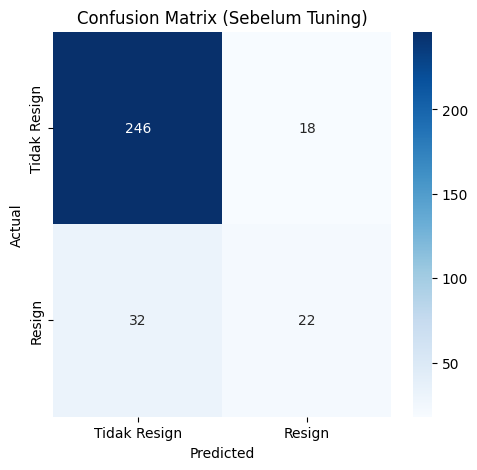

In [40]:
# Confusion Matrix - Sebelum Tuning
cm_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Tidak Resign', 'Resign'], 
           yticklabels=['Tidak Resign', 'Resign'])
plt.title('Confusion Matrix (Sebelum Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Hyperparameter Tunning

In [41]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'scale_pos_weight': [1, 2, 3]  # Menyeimbangkan bobot kelas 1
# }

# model = XGBClassifier(n_estimators=100, random_state=42)
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
# grid_search.fit(X_train_resampled, y_train_resampled)

# print("Parameter Terbaik:", grid_search.best_params_)

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

# ---------------------------------------------------------------
# 1. Definisikan Custom Scorer untuk Menyeimbangkan Recall & F1-Score
# ---------------------------------------------------------------
# Prioritaskan Recall, tetapi pertimbangkan F1-Score untuk akurasi
def custom_recall_f1(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return 0.7 * recall + 0.3 * f1  # Bobot lebih tinggi ke Recall

custom_scorer = make_scorer(custom_recall_f1)

# ---------------------------------------------------------------
# 2. Perbarui Hyperparameter Grid dengan Regulasi & Threshold
# ---------------------------------------------------------------
param_grid = {
    'learning_rate': [0.05, 0.1],     # Learning rate lebih rendah
    'max_depth': [3, 4],               # Batasi kedalaman pohon
    'subsample': [0.7, 0.8],           # Kurangi risiko overfitting
    'gamma': [0.1, 0.3],               # Tambahkan regularisasi
    'reg_alpha': [0.1, 0.5],           # Regularisasi L1
    'reg_lambda': [0.1, 0.5],          # Regularisasi L2
    'scale_pos_weight': [3, 5, 7]      # Beri bobot lebih ke kelas Resign
}

# ---------------------------------------------------------------
# 3. Gunakan Model dengan Early Stopping
# ---------------------------------------------------------------
model = XGBClassifier(
    n_estimators=200,
    early_stopping_rounds=10,
    eval_metric='logloss',
    random_state=42
)

# ---------------------------------------------------------------
# 4. Lakukan Grid Search dengan Cross-Validation Stratified
# ---------------------------------------------------------------
grid_search = GridSearchCV(
    model,
    param_grid,
    scoring='recall',  # Fokus utama ke recall
    cv=StratifiedKFold(n_splits=5, shuffle=True),
    n_jobs=-1
)

grid_search.fit(
    X_train_resampled, 
    y_train_resampled,
    eval_set=[(X_test, y_test)],  # Early stopping berdasarkan data test
    verbose=False
)

print("Parameter Terbaik:", grid_search.best_params_)

Parameter Terbaik: {'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'scale_pos_weight': 7, 'subsample': 0.7}


In [43]:
joblib.dump(grid_search.best_estimator_, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

In [44]:
best_model = grid_search.best_estimator_
# Simpan model terbaik  ke file    

In [45]:
from sklearn.metrics import precision_recall_curve

# Dapatkan probabilitas prediksi
y_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1] 

# Cari threshold optimal untuk F1-Score
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Turunkan threshold untuk prioritaskan recall
y_pred_adj = (y_proba > 0.35).astype(int)  # Threshold default 0.5 -> 0.35

Sesudah Tunning

In [46]:
from sklearn.metrics import classification_report

print("\033[1m" + "="*40 + "\033[0m")
print("\033[1mSESUDAH HYPERPARAMETER TUNING:\033[0m")
print("\033[1m" + "-"*40 + "\033[0m")
print(classification_report(y_test, y_pred_adj, target_names=['Tidak Resign', 'Resign']))

SESUDAH HYPERPARAMETER TUNING:
----------------------------------------
              precision    recall  f1-score   support

Tidak Resign       0.96      0.58      0.72       264
      Resign       0.30      0.87      0.44        54

    accuracy                           0.63       318
   macro avg       0.63      0.72      0.58       318
weighted avg       0.84      0.63      0.67       318



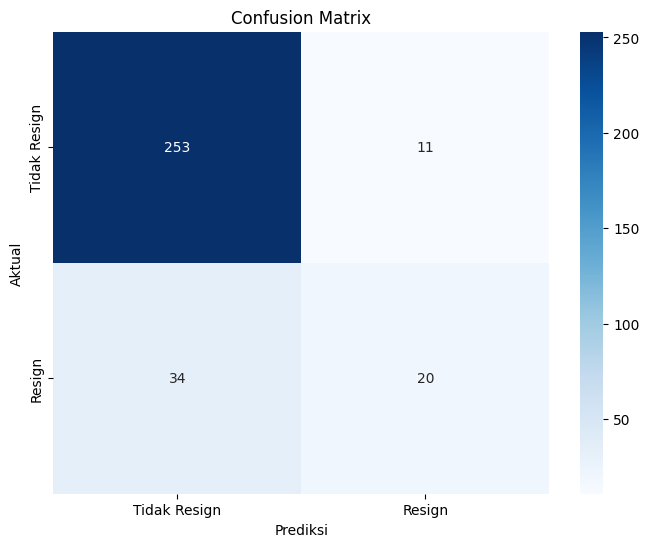

In [47]:
# Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Tidak Resign', 'Resign'], 
           yticklabels=['Tidak Resign', 'Resign'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

SHAP Value

In [48]:
best_model = grid_search.best_estimator_
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

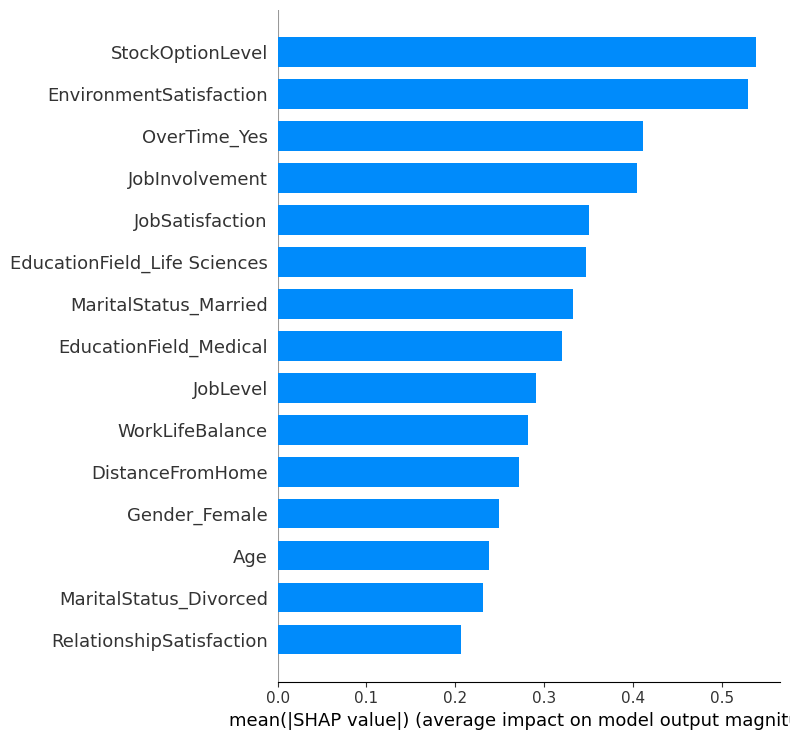

In [49]:
# Visualisasi Global Feature Importance
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15)

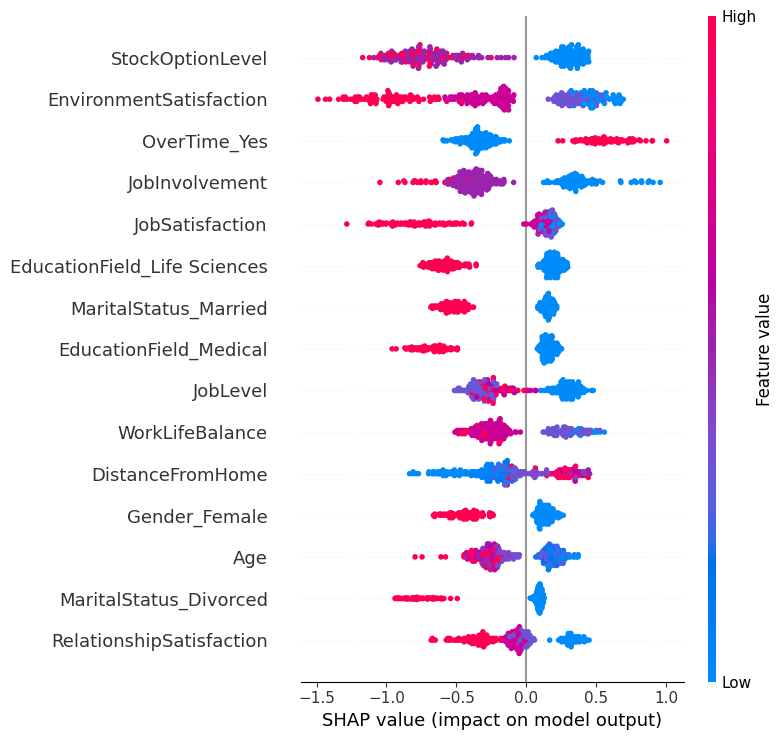

In [50]:
# 5. Summary Plot untuk Analisis Multivariat
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, max_display=15)

Interpretation

In [51]:
feature_importances = best_model.feature_importances_

In [52]:
# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

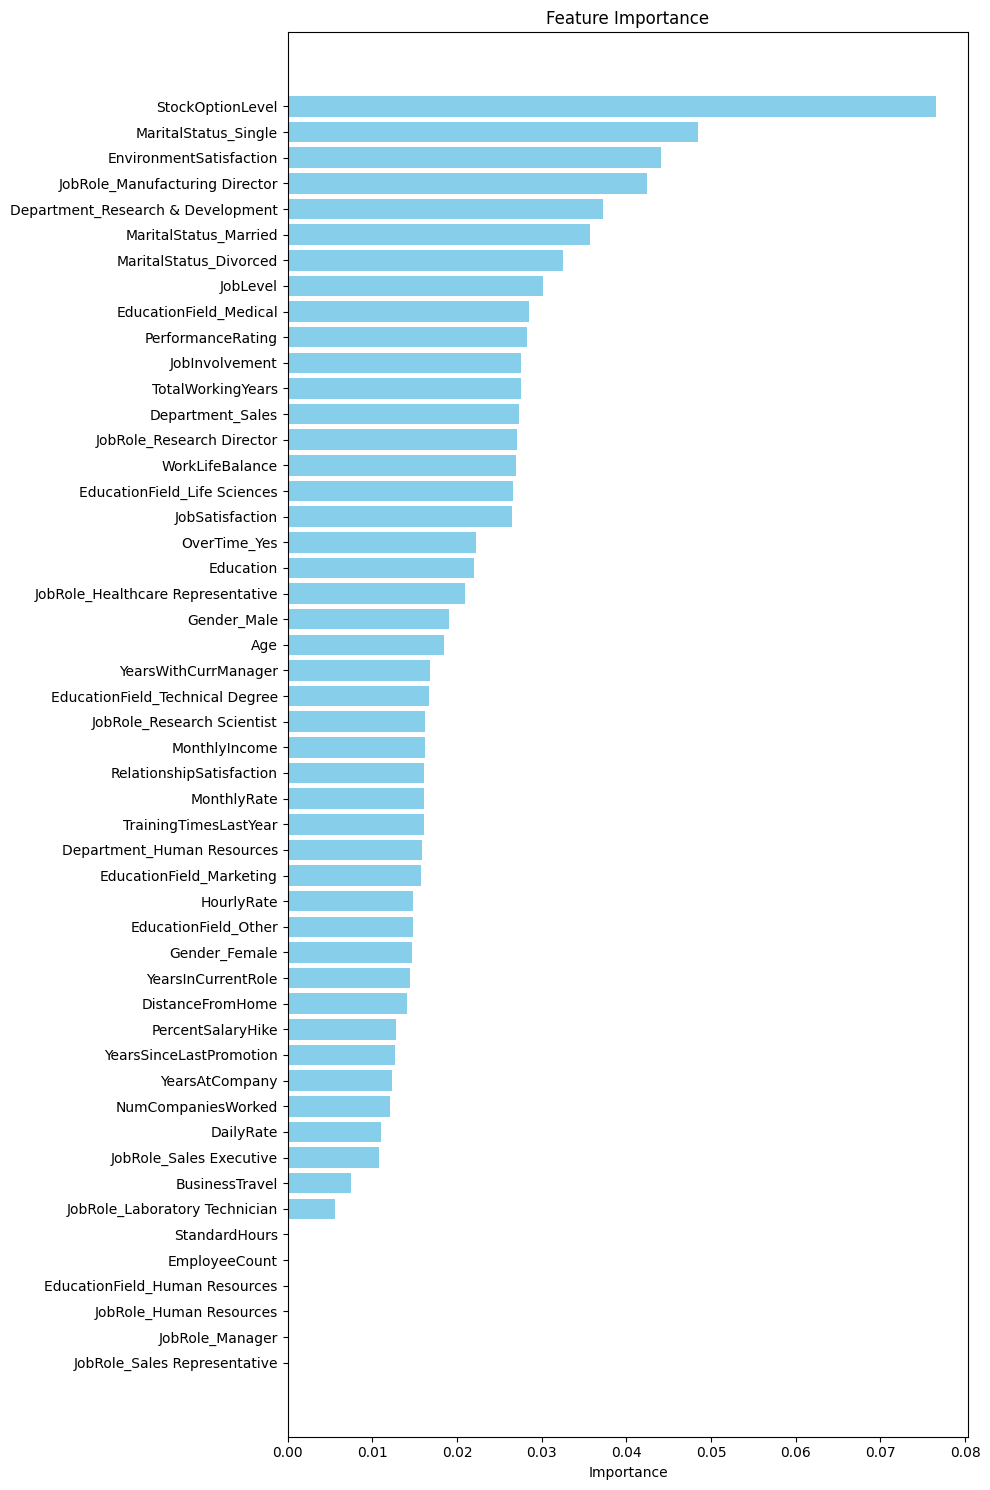

In [53]:
# Visualisasi Feature Importance
plt.figure(figsize=(10, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

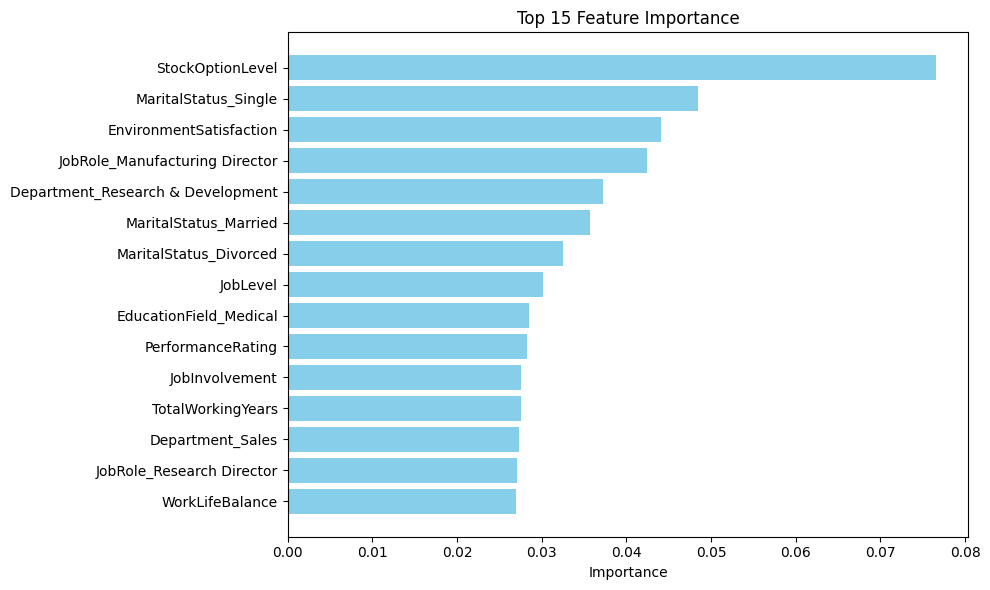

In [54]:
top_n = 15
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [55]:
importance_df

,Feature,Importance
18,StockOptionLevel,0.076560
48,MaritalStatus_Single,0.048451
6,EnvironmentSatisfaction,0.044072
41,JobRole_Manufacturing Director,0.042393
27,Department_Research & Development,0.037252
47,MaritalStatus_Married,0.035714
46,MaritalStatus_Divorced,0.032524
9,JobLevel,0.030180
32,EducationField_Medical,0.028450
15,PerformanceRating,0.028305


Kesimpulan

Proyek ini bertujuan untuk membantu tim HRD dalam memahami bagaimana keadaan jabatan, pengalaman, kondisi kerja dll mempengaruhi attrition rate karyawan pada perusahaan Jaya Jaya Maju. Dengan memanfaatkan feature importance dari model XGBoost kita dapat tahu seberapa besar pengaruh fitur terhadap attrition rate karyawan, berikut temuan yang didapatkan. 

# Analisis Feature Importance dan SHAP pada Model Attrition

---

## 1. Global Feature Importance (SHAP Values)

### Global Feature Importance

#### Fitur Paling Dominan:
- **StockOptionLevel**: Memiliki dampak tertinggi pada model. Karyawan dengan opsi saham rendah cenderung lebih mungkin resign.
- **EnvironmentSatisfaction**: Kepuasan lingkungan kerja yang rendah meningkatkan risiko resign.
- **OverTime_Yes**: Karyawan yang bekerja lembur (Overtime) memiliki risiko resign lebih tinggi.
- **JobInvolvement**: Keterlibatan rendah dalam pekerjaan berkorelasi dengan peningkatan attrition.

#### Interpretasi Bisnis:
- Kebijakan terkait **opsi saham**, **lingkungan kerja**, dan **jam lembur** perlu dievaluasi untuk mengurangi attrition.

---

## 2. SHAP Summary Plot (Analisis Multivariat)

### SHAP Summary Plot

#### Dampak Fitur pada Prediksi:
- **OverTime_Yes** (Nilai SHAP Positif): Titik merah (nilai tinggi) di sebelah kanan menunjukkan karyawan dengan OverTime = Yes memiliki risiko resign tinggi.
- **EnvironmentSatisfaction** (Nilai SHAP Negatif): Titik biru (nilai rendah) di sebelah kiri menunjukkan kepuasan lingkungan kerja yang rendah meningkatkan risiko resign.
- **StockOptionLevel**: Semakin rendah nilai fitur ini (warna biru), semakin tinggi risiko resign.

#### Pola Menarik:
- Karyawan dengan **EducationField_Life Sciences** atau **EducationField_Medical** cenderung lebih stabil (SHAP negatif).
- **MaritalStatus_Divorced** memiliki dampak positif pada resign, sedangkan **MaritalStatus_Married** dampaknya negatif.

---

## 3. Feature Importance dari Model

### Feature Importance

#### Konsistensi dengan SHAP:
- **StockOptionLevel**, **EnvironmentSatisfaction**, dan **OverTime_Yes** tetap menjadi fitur teratas.

#### Perbedaan:
- **JobRole_Manufacturing Director** muncul sebagai fitur penting di feature importance tetapi tidak di SHAP. Ini bisa terjadi karena interaksi kompleks dalam model.

#### Fitur Lain yang Relevan:
- **WorkLifeBalance**: Keseimbangan kerja-hidup yang buruk meningkatkan risiko resign.
- **JobSatisfaction**: Kepuasan kerja rendah berkontribusi pada keputusan resign.

---

## Kesimpulan

### Faktor Utama Penyebab Resign:

#### 1. Kebijakan Kompensasi:
- **StockOptionLevel rendah** dan **JobLevel rendah** adalah sinyal karyawan merasa kurang dihargai.

#### 2. Beban Kerja:
- **OverTime_Yes** dan **JobInvolvement rendah** menunjukkan beban kerja tidak seimbang.

#### 3. Lingkungan Kerja:
- **EnvironmentSatisfaction** dan **JobSatisfaction rendah** mencerminkan budaya kerja tidak sehat.

#### 4. Faktor Demografi:
- Karyawan dengan **MaritalStatus_Divorced** dan **Gender_Female** lebih rentan resign *(tergantung konteks data)*.


## Rekomendasi untuk HR

1. **Tingkatkan Kepuasan Lingkungan Kerja**  
   - Laksanakan program feedback rutin dari karyawan.  
   - Lakukan perbaikan dan pemeliharaan fasilitas kerja secara berkala.

2. **Batasi Overtime**  
   - Evaluasi ulang distribusi beban kerja antar tim.  
   - Sediakan insentif yang adil untuk lembur.

3. **Review Kebijakan Kompensasi**  
   - Tawarkan opsi saham atau tunjangan tambahan, terutama untuk karyawan level junior.

4. **Fleksibilitas Kerja**  
   - Terapkan program kerja dari rumah (WFH) sebagian atau penuh waktu.  
   - Dorong keseimbangan kehidupan kerja (Work-Life Balance) untuk meningkatkan produktivitas.


In [ ]:
# df.to_excel('employee_data_cleaned.xlsx', index=False)
# # df_final.to_excel('employee_data_final.xlsx', index=False)